# Using dclut with spikeglx files

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import dclut as dcl
from mimo_pack.fileio.spikeglx import dclut_from_meta, int2uV

In [2]:
bin_path = "D:\\SortingTemp\\24-05-31_DH23_A1-IC_g0\\24-05-31_DH23_A1-IC_g0_imec0\\24-05-31_DH23_A1-IC_g0_t0.imec0.ap.bin"
dcl_path = dclut_from_meta(bin_path)

# create dclut object, view properties
dcl_obj = dcl.dclut(dcl_path)
print(dcl_obj)

File: 24-05-31_DH23_A1-IC_g0_t0.imec0.ap.bin
Type: binary
Shape: [810401990, 385]
----------------

Data: data (au)
Type: int16
Scales:

  time (seconds)
  ----
  dimension: 0
  type: linear
  min: 0.0
  max: 27013.399666666668

  channel (none)
  -------
  dimension: 1
  type: index
  values: [  0 384]

  ch_name (none)
  -------
  dimension: 1
  type: list
  values: ['AP0;0' 'AP1;1' 'AP2;2' 'AP3;3' 'AP4;4' 'AP5;5' 'AP6;6' 'AP7;7' 'AP8;8'
 'AP9;9' 'AP10;10' 'AP11;11' 'AP12;12' 'AP13;13' 'AP14;14' 'AP15;15'
 'AP16;16' 'AP17;17' 'AP18;18' 'AP19;19' 'AP20;20' 'AP21;21' 'AP22;22'
 'AP23;23' 'AP24;24' 'AP25;25' 'AP26;26' 'AP27;27' 'AP28;28' 'AP29;29'
 'AP30;30' 'AP31;31' 'AP32;32' 'AP33;33' 'AP34;34' 'AP35;35' 'AP36;36'
 'AP37;37' 'AP38;38' 'AP39;39' 'AP40;40' 'AP41;41' 'AP42;42' 'AP43;43'
 'AP44;44' 'AP45;45' 'AP46;46' 'AP47;47' 'AP48;48' 'AP49;49' 'AP50;50'
 'AP51;51' 'AP52;52' 'AP53;53' 'AP54;54' 'AP55;55' 'AP56;56' 'AP57;57'
 'AP58;58' 'AP59;59' 'AP60;60' 'AP61;61' 'AP62;62' 'AP63;63' 

In [4]:
bin_pathN = "D:\\SortingTemp\\24-05-31_DH23_A1-IC_g0\\24-05-31_DH23_A1-IC_g0_t0.nidq.bin"
dcl_pathN = dclut_from_meta(bin_pathN)

# create dclut object, view properties
dcl_objN = dcl.dclut(dcl_pathN)
print(dcl_objN)

File: 24-05-31_DH23_A1-IC_g0_t0.nidq.bin
Type: binary
Shape: [286160384, 9]
----------------

Data: data (au)
Type: int16
Scales:

  time (seconds)
  ----
  dimension: 0
  type: linear
  min: 0.0
  max: 27013.54024955678

  channel (none)
  -------
  dimension: 1
  type: index
  values: [0 8]

  ch_name (none)
  -------
  dimension: 1
  type: list
  values: ['XA0;0' 'XA1;1' 'XA2;2' 'XA3;3' 'XA4;4' 'XA5;5' 'XA6;6' 'XA7;7' 'XD0;8']

  s0 (au)
  --
  dimension: 0
  type: index
  values: [        0 286160383]

  s1 (au)
  --
  dimension: 1
  type: index
  values: [0 8]



In [5]:
dcl_objN.intervals({'channel': [0, 9]})
data_N = dcl_objN.read()

In [8]:
data_N[0].shape

(286160384, 9)

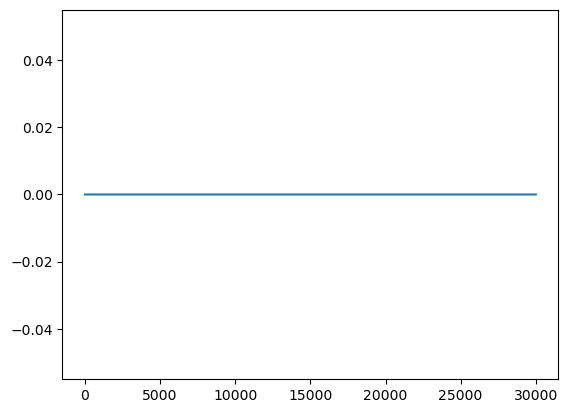

In [18]:
plt.plot(data_N[0][:30000,8])

In [14]:
# simple selection
dcl_obj.reset()
dcl_obj.points({'channel': [100]}) # select points
dcl_obj.intervals({'time': [0, 1]}) # select intervals, Nx2 array-like 
data = dcl_obj.read()
print(data)

[array([[194],
       [200],
       [204],
       ...,
       [148],
       [145],
       [145]], dtype=int16)]


2048 0.62


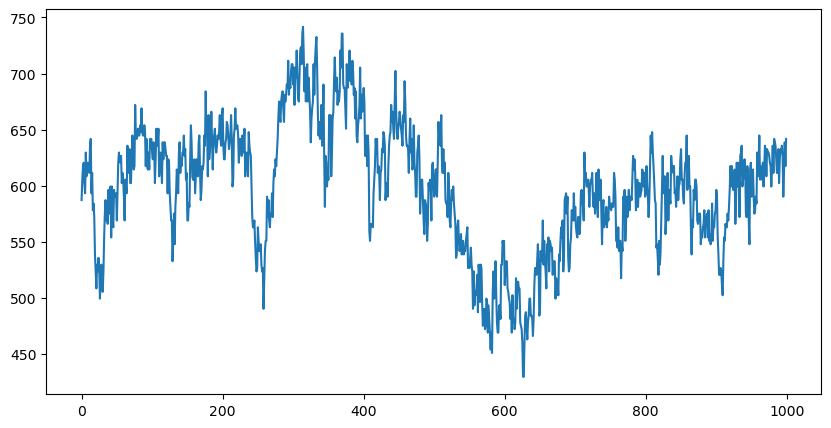

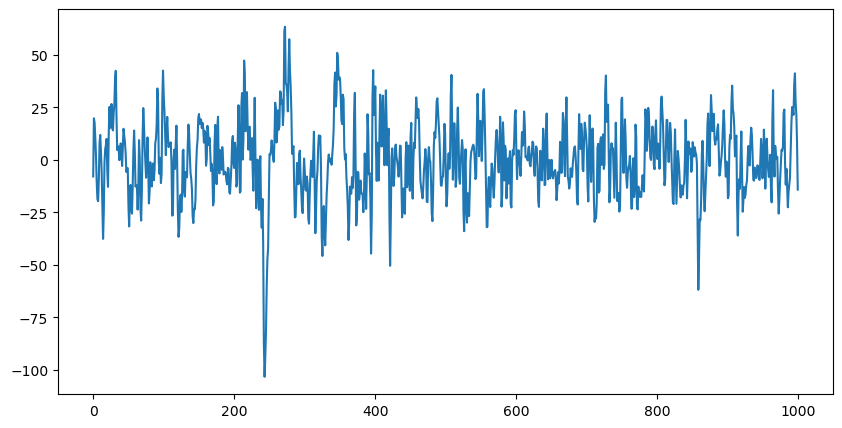

In [21]:

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(data[0][:1000]*conv_factor)

# high pass filter data using scipy
from scipy.signal import butter, filtfilt

def butter_highpass(cutoff, fs, order=1):
    nyquist = 0.5 * fs
    normal_cutoff = np.array([cutoff, 10000]) / nyquist
    b, a = butter(order, normal_cutoff, btype='bandpass', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

fs = 30000
cutoff = 300
order = 5
data_hp = butter_highpass_filter(data[0].T, cutoff, fs, order)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(data_hp[:,8000:9000].T*conv_factor)



In [5]:
# implicit selection of unspecified dimension
dcl_obj.reset()
dcl_obj.intervals({'time': [0, 1]})
data = dcl_obj.read()
print(data)

[array([[219, 272, 209, ..., 307, 273,  64],
       [222, 264, 210, ..., 309, 280,  64],
       [220, 264, 210, ..., 311, 276,  64],
       ...,
       [138, 182, 128, ..., 245, 215,  64],
       [137, 189, 126, ..., 251, 222,  64],
       [135, 187, 124, ..., 253, 227,  64]], dtype=int16)]


In [6]:
# fluent syntax is also supported, although it is generally considered 'un-pythonic'
data = dcl_obj.reset().intervals({'time': [0, 1]}).read()
print(data)

[array([[219, 272, 209, ..., 307, 273,  64],
       [222, 264, 210, ..., 309, 280,  64],
       [220, 264, 210, ..., 311, 276,  64],
       ...,
       [138, 182, 128, ..., 245, 215,  64],
       [137, 189, 126, ..., 251, 222,  64],
       [135, 187, 124, ..., 253, 227,  64]], dtype=int16)]


In [7]:
# return in xarray format
data = dcl_obj.read(format='xarray')
print(data)

[<xarray.DataArray (time: 30000, channel: 385)> Size: 23MB
array([[219, 272, 209, ..., 307, 273,  64],
       [222, 264, 210, ..., 309, 280,  64],
       [220, 264, 210, ..., 311, 276,  64],
       ...,
       [138, 182, 128, ..., 245, 215,  64],
       [137, 189, 126, ..., 251, 222,  64],
       [135, 187, 124, ..., 253, 227,  64]], dtype=int16)
Coordinates:
  * time      (time) float64 240kB 0.0 3.333e-05 6.667e-05 ... 0.9999 0.9999 1.0
  * channel   (channel) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383 384
    ch_name   (channel) <U9 14kB 'AP0;0' 'AP1;1' ... 'AP383;383' 'SY0;384'
    ch_order  (channel) int32 2kB 242 243 244 245 246 ... 334 335 336 337 384
    ch_x      (channel) float64 3kB 527.0 559.0 527.0 559.0 ... 777.0 809.0 nan
    ch_y      (channel) float64 3kB 3.6e+03 3.6e+03 3.615e+03 ... 3.585e+03 nan
    ch_shank  (channel) float64 3kB 2.0 2.0 2.0 2.0 2.0 ... 3.0 3.0 3.0 3.0 nan
    s0        (time) int64 240kB 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
    s

In [8]:
# concatenate multiple selections
dcl_obj.reset()
dcl_obj.intervals({'time': [0, 1]})
dcl_obj.intervals({'time': [10, 12]})
data = dcl_obj.read(format='xarray') # union is the default mode
data

[<xarray.DataArray (time: 90000, channel: 385)> Size: 69MB
 array([[219, 272, 209, ..., 307, 273,  64],
        [222, 264, 210, ..., 309, 280,  64],
        [220, 264, 210, ..., 311, 276,  64],
        ...,
        [178, 223, 169, ..., 281, 253,  64],
        [169, 216, 155, ..., 284, 262,  64],
        [173, 215, 166, ..., 282, 259,  64]], dtype=int16)
 Coordinates:
   * time      (time) float64 720kB 0.0 3.333e-05 6.667e-05 ... 12.0 12.0 12.0
   * channel   (channel) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383 384
     ch_name   (channel) <U9 14kB 'AP0;0' 'AP1;1' ... 'AP383;383' 'SY0;384'
     ch_order  (channel) int32 2kB 242 243 244 245 246 ... 334 335 336 337 384
     ch_x      (channel) float64 3kB 527.0 559.0 527.0 559.0 ... 777.0 809.0 nan
     ch_y      (channel) float64 3kB 3.6e+03 3.6e+03 3.615e+03 ... 3.585e+03 nan
     ch_shank  (channel) float64 3kB 2.0 2.0 2.0 2.0 2.0 ... 3.0 3.0 3.0 3.0 nan
     s0        (time) int64 720kB 0 1 2 3 4 ... 359996 359997 359998 359

In [9]:
# same as above, only one call to intervals needed. Each row is a different interval.
dcl_obj.reset()
dcl_obj.intervals({'time': [[0, 1], [10, 12]]})
data = dcl_obj.read(format='xarray') # union is the default mode
data

[<xarray.DataArray (time: 90000, channel: 385)> Size: 69MB
 array([[219, 272, 209, ..., 307, 273,  64],
        [222, 264, 210, ..., 309, 280,  64],
        [220, 264, 210, ..., 311, 276,  64],
        ...,
        [178, 223, 169, ..., 281, 253,  64],
        [169, 216, 155, ..., 284, 262,  64],
        [173, 215, 166, ..., 282, 259,  64]], dtype=int16)
 Coordinates:
   * time      (time) float64 720kB 0.0 3.333e-05 6.667e-05 ... 12.0 12.0 12.0
   * channel   (channel) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383 384
     ch_name   (channel) <U9 14kB 'AP0;0' 'AP1;1' ... 'AP383;383' 'SY0;384'
     ch_order  (channel) int32 2kB 242 243 244 245 246 ... 334 335 336 337 384
     ch_x      (channel) float64 3kB 527.0 559.0 527.0 559.0 ... 777.0 809.0 nan
     ch_y      (channel) float64 3kB 3.6e+03 3.6e+03 3.615e+03 ... 3.585e+03 nan
     ch_shank  (channel) float64 3kB 2.0 2.0 2.0 2.0 2.0 ... 3.0 3.0 3.0 3.0 nan
     s0        (time) int64 720kB 0 1 2 3 4 ... 359996 359997 359998 359

In [10]:
# in union mode, overlapping selections are merged, dubplicate selections are not returned
dcl_obj.reset()
dcl_obj.intervals({'time': [[0, 1], [0.5, 2]]})
data = dcl_obj.read(format='xarray')
data

[<xarray.DataArray (time: 60000, channel: 385)> Size: 46MB
 array([[219, 272, 209, ..., 307, 273,  64],
        [222, 264, 210, ..., 309, 280,  64],
        [220, 264, 210, ..., 311, 276,  64],
        ...,
        [ 93, 135,  91, ..., 211, 187,  64],
        [ 94, 131,  83, ..., 216, 180,  64],
        [ 90, 140,  80, ..., 215, 183,  64]], dtype=int16)
 Coordinates:
   * time      (time) float64 480kB 0.0 3.333e-05 6.667e-05 ... 2.0 2.0 2.0
   * channel   (channel) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383 384
     ch_name   (channel) <U9 14kB 'AP0;0' 'AP1;1' ... 'AP383;383' 'SY0;384'
     ch_order  (channel) int32 2kB 242 243 244 245 246 ... 334 335 336 337 384
     ch_x      (channel) float64 3kB 527.0 559.0 527.0 559.0 ... 777.0 809.0 nan
     ch_y      (channel) float64 3kB 3.6e+03 3.6e+03 3.615e+03 ... 3.585e+03 nan
     ch_shank  (channel) float64 3kB 2.0 2.0 2.0 2.0 2.0 ... 3.0 3.0 3.0 3.0 nan
     s0        (time) int64 480kB 0 1 2 3 4 5 ... 59995 59996 59997 59998 5

In [11]:
# If you add a selection with select_mode set to 'intersect', only sections that overlap previous selections, will be returned
dcl_obj.reset()
dcl_obj.intervals({'time': [0, 1]})
dcl_obj.intervals({'time': [0.5, 2]}, select_mode='intersect')
data = dcl_obj.read(format='xarray')
data

[<xarray.DataArray (time: 15000, channel: 385)> Size: 12MB
 array([[184, 225, 172, ..., 275, 238,  64],
        [182, 223, 168, ..., 270, 230,  64],
        [171, 224, 165, ..., 274, 238,  64],
        ...,
        [138, 182, 128, ..., 245, 215,  64],
        [137, 189, 126, ..., 251, 222,  64],
        [135, 187, 124, ..., 253, 227,  64]], dtype=int16)
 Coordinates:
   * time      (time) float64 120kB 0.5 0.5 0.5001 0.5001 ... 0.9999 0.9999 1.0
   * channel   (channel) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383 384
     ch_name   (channel) <U9 14kB 'AP0;0' 'AP1;1' ... 'AP383;383' 'SY0;384'
     ch_order  (channel) int32 2kB 242 243 244 245 246 ... 334 335 336 337 384
     ch_x      (channel) float64 3kB 527.0 559.0 527.0 559.0 ... 777.0 809.0 nan
     ch_y      (channel) float64 3kB 3.6e+03 3.6e+03 3.615e+03 ... 3.585e+03 nan
     ch_shank  (channel) float64 3kB 2.0 2.0 2.0 2.0 2.0 ... 3.0 3.0 3.0 3.0 nan
     s0        (time) int64 120kB 15000 15001 15002 15003 ... 29997 299

In [12]:
# read multiple selections separately with split mode
dcl_obj.reset()
dcl_obj.intervals({'time': [[0, 1], [5, 6], [10, 11]]}, select_mode='split')
data = dcl_obj.read(format='xarray')
data

[<xarray.DataArray (time: 30000, channel: 385)> Size: 23MB
 array([[219, 272, 209, ..., 307, 273,  64],
        [222, 264, 210, ..., 309, 280,  64],
        [220, 264, 210, ..., 311, 276,  64],
        ...,
        [138, 182, 128, ..., 245, 215,  64],
        [137, 189, 126, ..., 251, 222,  64],
        [135, 187, 124, ..., 253, 227,  64]], dtype=int16)
 Coordinates:
   * time      (time) float64 240kB 0.0 3.333e-05 6.667e-05 ... 0.9999 0.9999 1.0
   * channel   (channel) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383 384
     ch_name   (channel) <U9 14kB 'AP0;0' 'AP1;1' ... 'AP383;383' 'SY0;384'
     ch_order  (channel) int32 2kB 242 243 244 245 246 ... 334 335 336 337 384
     ch_x      (channel) float64 3kB 527.0 559.0 527.0 559.0 ... 777.0 809.0 nan
     ch_y      (channel) float64 3kB 3.6e+03 3.6e+03 3.615e+03 ... 3.585e+03 nan
     ch_shank  (channel) float64 3kB 2.0 2.0 2.0 2.0 2.0 ... 3.0 3.0 3.0 3.0 nan
     s0        (time) int64 240kB 0 1 2 3 4 5 ... 29995 29996 29997 2

In [13]:
# you can follow a split with selection with an intersection selection to only return
# the overlapping sections of the split selections
dcl_obj.reset()
dcl_obj.intervals({'time': [[0, 1], [5, 6], [10, 11]]}, select_mode='split')
dcl_obj.intervals({'time': [4, 7]}, select_mode='intersect')
data = dcl_obj.read(format='xarray')
data

# note that empty arrays are returned for the not-selected layers.

[<xarray.DataArray (time: 0, channel: 385)> Size: 0B
 array([], shape=(0, 385), dtype=int16)
 Coordinates:
   * time      (time) float64 0B 
   * channel   (channel) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383 384
     ch_name   (channel) <U9 14kB 'AP0;0' 'AP1;1' ... 'AP383;383' 'SY0;384'
     ch_order  (channel) int32 2kB 242 243 244 245 246 ... 334 335 336 337 384
     ch_x      (channel) float64 3kB 527.0 559.0 527.0 559.0 ... 777.0 809.0 nan
     ch_y      (channel) float64 3kB 3.6e+03 3.6e+03 3.615e+03 ... 3.585e+03 nan
     ch_shank  (channel) float64 3kB 2.0 2.0 2.0 2.0 2.0 ... 3.0 3.0 3.0 3.0 nan
     s0        (time) int64 0B 
     s1        (channel) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383 384,
 <xarray.DataArray (time: 30000, channel: 385)> Size: 23MB
 array([[141, 176, 128, ..., 228, 206,   0],
        [140, 182, 127, ..., 227, 198,   0],
        [136, 183, 127, ..., 221, 204,   0],
        ...,
        [157, 206, 143, ..., 265, 262,   0],
        [152, 

In [14]:
# splitting along two dimensions, both must have the same number of indexing calls
dcl_obj.reset()
dcl_obj.points({'channel': [0, 1]}, select_mode='split')
dcl_obj.intervals({'time': [[0, 1], [0.5, 2]]}, select_mode='split')
data = dcl_obj.read(format='xarray')
data

[<xarray.DataArray (time: 30000, channel: 1)> Size: 60kB
 array([[219],
        [222],
        [220],
        ...,
        [138],
        [137],
        [135]], dtype=int16)
 Coordinates:
   * time      (time) float64 240kB 0.0 3.333e-05 6.667e-05 ... 0.9999 0.9999 1.0
   * channel   (channel) int64 8B 0
     ch_name   (channel) <U9 36B 'AP0;0'
     ch_order  (channel) int32 4B 242
     ch_x      (channel) float64 8B 527.0
     ch_y      (channel) float64 8B 3.6e+03
     ch_shank  (channel) float64 8B 2.0
     s0        (time) int64 240kB 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
     s1        (channel) int64 8B 0,
 <xarray.DataArray (time: 45000, channel: 1)> Size: 90kB
 array([[225],
        [223],
        [224],
        ...,
        [135],
        [131],
        [140]], dtype=int16)
 Coordinates:
   * time      (time) float64 360kB 0.5 0.5 0.5001 0.5001 ... 2.0 2.0 2.0 2.0
   * channel   (channel) int64 8B 1
     ch_name   (channel) <U9 36B 'AP1;1'
     ch_order  (channel) int3

In [15]:
# if you wanted to split along channels, you would need to specify it explcitly.
dcl_obj.reset()
dcl_obj.points({'channel': np.arange(385)}, select_mode='split')
dcl_obj.intervals({'time': [0, 1]})
data = dcl_obj.read(format='xarray')
len(data)

385

In [16]:
# if your dimensions have different numbers of selections, then splitting will not work
dcl_obj.reset()
dcl_obj.points({'channel': np.arange(385)}, select_mode='split')
dcl_obj.intervals({'time': [[0, 1], [2, 3]]}, select_mode='split')
data = dcl_obj.read(format='xarray')

ValueError: Selections are not compatible for split mode

In [17]:
# you can provide multiple scales for a single dimension, and if they are
# of the list type then the selection closest to both of them will be used.
# This is especially helpful if you want to select a specific channel based
# on its location.
dcl_obj.reset()
dcl_obj.points({'ch_x': [700], 'ch_y': [4000]})
dcl_obj.intervals({'time': [0, 1]}) 
data = dcl_obj.read(format='xarray')
data

[<xarray.DataArray (time: 30000, channel: 1)> Size: 60kB
 array([[243],
        [243],
        [241],
        ...,
        [165],
        [162],
        [168]], dtype=int16)
 Coordinates:
   * time      (time) float64 240kB 0.0 3.333e-05 6.667e-05 ... 0.9999 0.9999 1.0
   * channel   (channel) int64 8B 92
     ch_name   (channel) <U9 36B 'AP92;92'
     ch_order  (channel) int32 4B 382
     ch_x      (channel) float64 8B 777.0
     ch_y      (channel) float64 8B 3.93e+03
     ch_shank  (channel) float64 8B 3.0
     s0        (time) int64 240kB 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
     s1        (channel) int64 8B 92]

In [18]:
# sometimes a selecting a specific point will select multiple indices. This is because
# the point corresponds to multiple selection indices. This only happens with 'list' type scales 
# when multiple indices satisfy the selection.

dcl_obj.reset()
dcl_obj.points({'ch_shank': [0]})
dcl_obj.intervals({'time': [0, 1]})
data = dcl_obj.read(format='xarray')
data

[<xarray.DataArray (time: 30000, channel: 96)> Size: 6MB
 array([[252, 216, 159, ..., 188, 270, 227],
        [257, 220, 159, ..., 184, 270, 221],
        [246, 213, 150, ..., 165, 272, 217],
        ...,
        [180, 149,  96, ..., 130, 230, 175],
        [180, 150,  94, ..., 132, 225, 163],
        [175, 145,  96, ..., 137, 231, 165]], dtype=int16)
 Coordinates:
   * time      (time) float64 240kB 0.0 3.333e-05 6.667e-05 ... 0.9999 0.9999 1.0
   * channel   (channel) int64 768B 46 47 96 97 98 99 ... 232 233 234 235 236 237
     ch_name   (channel) <U9 3kB 'AP46;46' 'AP47;47' ... 'AP236;236' 'AP237;237'
     ch_order  (channel) int32 384B 0 1 2 3 4 5 6 7 8 ... 88 89 90 91 92 93 94 95
     ch_x      (channel) float64 768B 27.0 59.0 27.0 59.0 ... 27.0 59.0 27.0 59.0
     ch_y      (channel) float64 768B 3.225e+03 3.225e+03 ... 3.93e+03 3.93e+03
     ch_shank  (channel) float64 768B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
     s0        (time) int64 240kB 0 1 2 3 4 5 ... 29995 29996

In [19]:
# similar to the above, but based based on closeness
dcl_obj.reset()
dcl_obj.points({'ch_x': [26]})
dcl_obj.intervals({'time': [0, 1]})
data = dcl_obj.read(format='xarray')
data

[<xarray.DataArray (time: 30000, channel: 48)> Size: 3MB
 array([[252, 159, 244, ..., 234, 178, 270],
        [257, 159, 241, ..., 243, 187, 270],
        [246, 150, 235, ..., 225, 174, 272],
        ...,
        [180,  96, 180, ..., 189, 134, 230],
        [180,  94, 178, ..., 182, 131, 225],
        [175,  96, 182, ..., 197, 140, 231]], dtype=int16)
 Coordinates:
   * time      (time) float64 240kB 0.0 3.333e-05 6.667e-05 ... 0.9999 0.9999 1.0
   * channel   (channel) int64 384B 46 96 98 100 102 104 ... 228 230 232 234 236
     ch_name   (channel) <U9 2kB 'AP46;46' 'AP96;96' ... 'AP234;234' 'AP236;236'
     ch_order  (channel) int32 192B 0 2 4 6 8 10 12 14 ... 82 84 86 88 90 92 94
     ch_x      (channel) float64 384B 27.0 27.0 27.0 27.0 ... 27.0 27.0 27.0 27.0
     ch_y      (channel) float64 384B 3.225e+03 3.24e+03 ... 3.915e+03 3.93e+03
     ch_shank  (channel) float64 384B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
     s0        (time) int64 240kB 0 1 2 3 4 5 ... 29995 29996 29

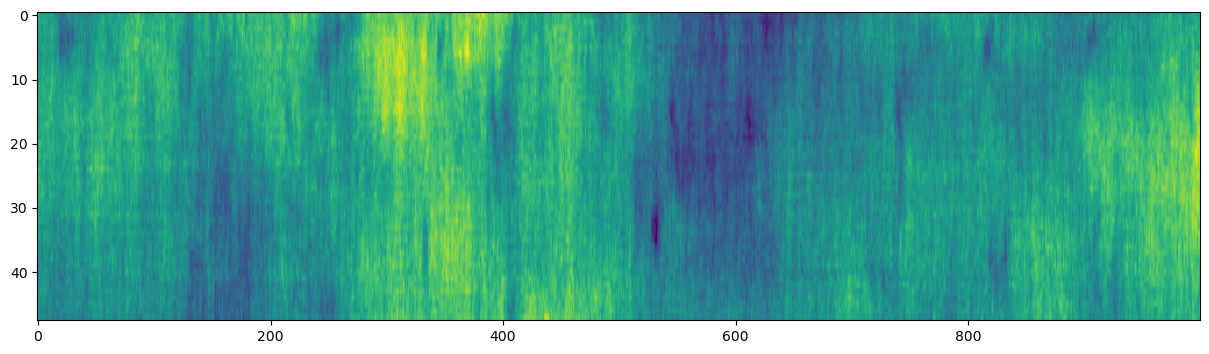

In [20]:
#  a nice demonstration of the power of xarrays. Please refer to their documentation
# for more information. (https://docs.xarray.dev/en/stable/index.html)
fig, ax = plt.subplots(figsize=(15,4))
data_snip = data[0].sortby('ch_y').data[:1000,:]
plt.imshow((data_snip-np.mean(data_snip,axis=0)).T, aspect='auto')

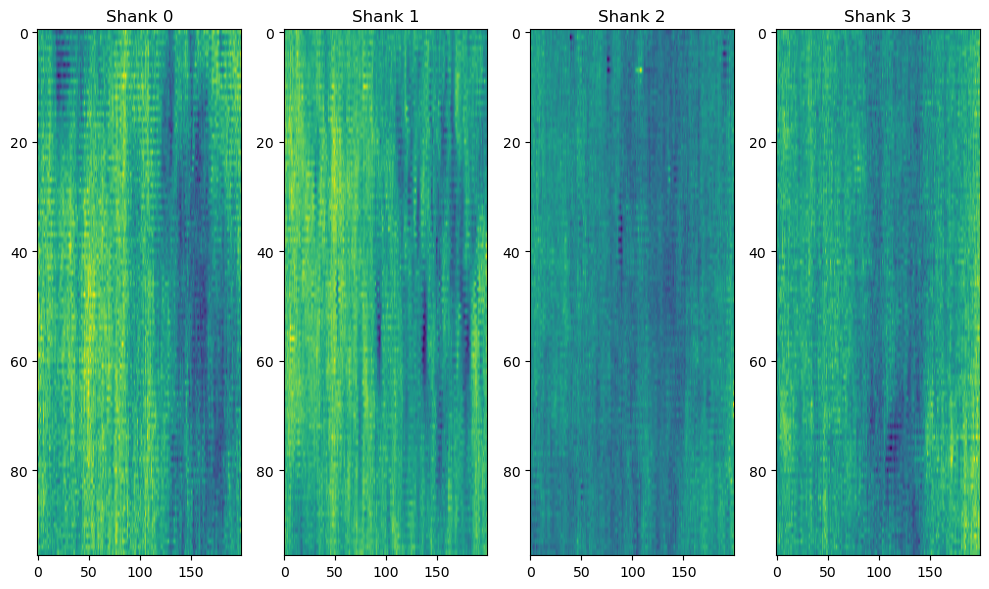

In [21]:
# lets try visualzing across all shanks
dcl_obj.reset()
dcl_obj.points({'ch_shank': np.arange(4)}, select_mode='split') # split along shanks
dcl_obj.intervals({'time': [0, 1]})
data = dcl_obj.read(format='xarray')
fig, ax = plt.subplots(1,4, figsize=(10,6))
for i in range(4):
    data_snip = data[i].sortby('ch_y').data[:200,:]
    ax[i].imshow((data_snip-np.mean(data_snip,axis=0)).T, aspect='auto')
    ax[i].set_title(f'Shank {i}')
fig.tight_layout()
plt.show()


In [23]:
# loading a lot of data (a single channel for the entire recording duration)
# sometimes you need to split the data into smaller chunks to avoid memory errors
# setting verbose=True will show a progress bar for each chunk
dcl_obj = dcl.dclut(dcl_path, verbose=True)

# create an array of edges for 1 minute intervals
max_sec = dcl_obj.scale_values('time')[-1]
min_edges = np.append(np.arange(0, max_sec, 60), max_sec)
min_intervals = np.stack([min_edges[:-1], min_edges[1:]],axis=1)

# configure the dclut object to read a single channel
dcl_obj.intervals({'time': min_intervals}, select_mode='split')
dcl_obj.points({'channel': [384]})
sync = dcl_obj.read(format='xarray')

# concatenate the data along the time dimension using xarray
full_sync = xr.concat(sync, dim='time')

100%|██████████| 451/451 [25:02<00:00,  3.33s/it]
